<a href="https://colab.research.google.com/github/tavaresgani/ClassificacaoDeEmailESpam/blob/main/ClassificacaoDeEmailESpam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação de E-mails: Spam vs Não-Spam
Este projeto tem como objetivo classificar e-mails como *spam* ou *não-spam* (também chamados de *ham*) utilizando técnicas de **Processamento de Linguagem Natural (NLP)** e um modelo de **Rede Neural** com TensorFlow/Keras.

A base utilizada é o `spam.csv`, que contém mensagens de e-mail rotuladas. O projeto aborda a leitura, pré-processamento, balanceamento, tokenização e treino do modelo, além de visualização dos resultados.

## 1. Bibliotecas Utilizadas
Importação das bibliotecas necessárias para manipulação de dados, visualização, pré-processamento de texto e construção do modelo.

In [1]:
#Importando as bibliotecas
import pandas as pd
import numpy as np
import random

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Dropout
from tensorflow.keras.models import Model

## 2. Semente Aleatória
Garantir reprodutibilidade dos resultados com sementes fixas para NumPy, TensorFlow e random.

In [2]:
#garante a aleatoriedade
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)
random.seed(SEED)

## 3. Leitura da Base de Dados
A base contém e-mails rotulados como **spam** (indesejados) e **ham** (válidos).

In [3]:
#Lendo o arquivo que contem os emails
spam = pd.read_csv('/content/spam.csv')
spam.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Visualizando o formato do dataset após leitura.

In [4]:
#Vendo o formato dos dados
spam.shape

(5572, 2)

## 4. Distribuição das Classes
Verificando a quantidade de mensagens spam e não-spam.

In [5]:
count = spam['Category'].value_counts()
print(count)

Category
ham     4825
spam     747
Name: count, dtype: int64


## 5. Balanceamento da Base
Para evitar viés do modelo, o número de exemplos de spam e ham foi igualado.

In [6]:
#Filtrando aleatoriamente os emails validos com a mesma quantidade
ham_samples = spam[spam['Category'] == 'ham'].sample(n=747, random_state=42)
spam_samples = spam[spam['Category'] == 'spam']

#Juntando os dois tipos e misturando spam e ham e resetando o indice e criando um novo
spam = pd.concat([ham_samples, spam_samples]).sample(frac=1, random_state=42).reset_index(drop=True) #drop exclui indice original

Visualizando o formato do dataset após leitura.

In [7]:
spam.shape

(1494, 2)

## 6. Codificação dos Rótulos
Convertendo as categorias (spam e ham) para valores numéricos: 0 = ham, 1 = spam.

In [8]:
#Transformando em 0 e 1
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(spam['Category'])


In [9]:
y

array([1, 1, 1, ..., 1, 1, 1])

## 7. Divisão dos Dados
Separando os dados em treino (70%) e teste (30%).

In [10]:
#Separando os dados em train e test
mensagens = spam['Message'].values
X_train, X_test, y_train, y_test = train_test_split(mensagens, y, test_size=0.3, random_state=43) #test size = 30% vão para teste e 70% treino

###Processamento Natural dos Dados

## 8. Tokenização e Padronização

Convertendo os textos dos e-mails em sequências de números para entrada na rede neural.

In [11]:
#Criar um token e transforma palavras em indices numericos
#Utilizando as 1000 palavras que mais aparecem
token = Tokenizer(num_words=1000)

#Treinar o tokenizador com os dados do treino
token.fit_on_texts(X_train)

#Colocar em sequencia numerica
X_train = token.texts_to_sequences(X_train)
X_test = token.texts_to_sequences(X_test)

In [12]:
print(X_train)

[[404, 404, 101, 11, 46, 880], [702, 702, 102, 453, 1, 5, 87, 2, 302, 22, 302], [610, 881, 83, 87, 48, 2, 77, 22, 1, 148, 453], [256, 36, 8, 60, 22], [50, 272, 1, 80, 2, 362, 7, 1, 43, 192, 21, 3, 51, 58, 882, 12, 273, 883, 32, 15, 6, 274, 9, 193], [204, 129, 13, 35, 20, 405, 257, 21, 454, 231, 28, 114, 1, 510, 10, 275, 511, 276, 27, 71, 107, 884, 277, 363, 406, 88, 19, 278, 15, 29], [139, 407, 6, 885, 1, 35, 7, 81, 124, 53, 15, 205, 303, 304, 1, 3, 149, 337, 10], [4, 125, 112, 703, 455, 338, 21, 886, 16, 102, 1, 704, 4, 102, 3, 887, 305, 170, 304, 306, 888, 21, 84], [232, 217, 4, 218, 705, 21, 12], [150, 206, 408, 51, 456, 364, 1, 7, 27, 126, 61], [22, 13, 307, 4, 512, 5, 409, 33, 115, 46, 889, 308, 96, 47, 8], [10, 19, 410, 15, 20, 171, 457, 411, 410, 108, 1, 184, 1, 339, 12, 30], [154, 34, 17, 11, 17, 52, 233, 340, 11, 155, 52, 116, 46, 4, 185, 2, 3, 194, 67, 2, 309, 5, 458, 97, 341, 170, 9, 5], [172, 611, 4, 18, 1], [20, 53, 513, 11, 514, 207, 310, 1, 706, 20, 53, 17, 10, 44, 53, 1

In [13]:
#Transformar o texto em tamanho padrão
X_train = pad_sequences(X_train, padding='post', maxlen=500)
X_test = pad_sequences(X_test, padding='post', maxlen=500)

In [14]:
# Criando a rede neural
input_layer = Input(shape=(500,))  # Entrada com 500 palavras (tokens)

# Camada de embedding: transforma cada palavra (número) em um vetor com 50 dimensões
embedding_layer = Embedding(input_dim=len(token.word_index), output_dim=50)(input_layer)

# Achata a matriz (500 x 50) em um vetor único para passar para a camada densa
flatten_layer = Flatten()(embedding_layer)

# Camada densa com 10 neurônios e função de ativação ReLU (ativa os neurônios)
dense_layer = Dense(units=10, activation='relu')(flatten_layer)

# Dropout: desativa 10% dos neurônios aleatoriamente durante o treino para evitar overfitting
dropout_layer = Dropout(0.1)(dense_layer)

# Camada de saída com 1 neurônio e ativação sigmoid (retorna valor entre 0 e 1 → probabilidade)
output_layer = Dense(units=1, activation='sigmoid')(dropout_layer)

# Cria o modelo ligando a entrada à saída
model = Model(inputs=input_layer, outputs=output_layer)


In [15]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [16]:
#Treinando o modelo para reconhecer emails e spam
model.fit(X_train, y_train, epochs=20, batch_size=10, validation_data=(X_test, y_test))

Epoch 1/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.5571 - loss: 0.2419 - val_accuracy: 0.8040 - val_loss: 0.1858
Epoch 2/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8228 - loss: 0.1718 - val_accuracy: 0.8998 - val_loss: 0.1408
Epoch 3/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9127 - loss: 0.1321 - val_accuracy: 0.9465 - val_loss: 0.1222
Epoch 4/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9228 - loss: 0.1198 - val_accuracy: 0.9688 - val_loss: 0.1106
Epoch 5/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9305 - loss: 0.1108 - val_accuracy: 0.9555 - val_loss: 0.1014
Epoch 6/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9403 - loss: 0.0967 - val_accuracy: 0.9599 - val_loss: 0.0408
Epoch 7/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9081 - loss: 0.0528 - val_accuracy: 0.9644 - val_loss: 0.0295
Epoch 8/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9392 - loss: 0.0376 - val_accuracy

In [17]:
#Gerando as metricas com base no teste
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss:', loss)
print(f'Acuracia:', accuracy)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9396 - loss: 0.0443 
Loss: 0.039310820400714874
Acuracia: 0.9465478658676147


In [18]:
#Criando uma nova previsão com modelo ja existente
nova_previsao = model.predict(X_test)
print(nova_previsao[2:5]) #representa a probabilidade de ser spam

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
[[0.9746672 ]
 [0.02741843]
 [0.00564385]]


In [19]:
#Trasnformando em valores booleanos
prev = (nova_previsao > 0.5)

#True = spam // False = não é spam
print(prev[2:5])

[[ True]
 [False]
 [False]]


In [20]:
# Força a matriz a ter as classes 0 e 1, mesmo que uma esteja ausente
cm = confusion_matrix(y_test, prev, labels=[0, 1])

# Cria DataFrame com rótulos legíveis
cm_df = pd.DataFrame(cm,
                     index=['Real: Não-Spam', 'Real: Spam'],
                     columns=['Previsto: Não-Spam', 'Previsto: Spam'])

print(cm_df)


                Previsto: Não-Spam  Previsto: Spam
Real: Não-Spam                 216              16
Real: Spam                       8             209


In [21]:
# Força a matriz a ter as classes 0 e 1, mesmo que uma esteja ausente
cm = confusion_matrix(y_test, prev)
print(cm)


[[216  16]
 [  8 209]]


A matriz de confusão permite ver os acertos e erros do modelo em termos de classificação correta (valores na diagonal) e erros (fora da diagonal). O ideal é que os valores da diagonal sejam altos.


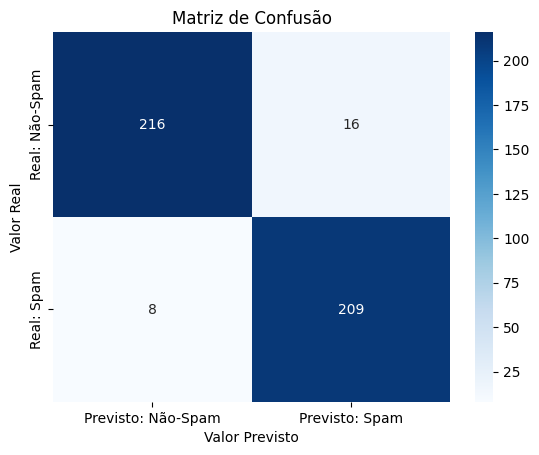

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.ylabel('Valor Real')
plt.xlabel('Valor Previsto')
plt.show()


## 9. Gráfico de Distribuição das Classes

Mostrando o desequilibrio entre ham e spam

Este gráfico mostra que a base de dados original está fortemente desbalanceada: há muito mais mensagens legítimas (**ham**) do que mensagens indesejadas (**spam**). Isso poderia fazer com que o modelo aprendesse a classificar tudo como ham, já que essa é a classe majoritária. Por isso, foi necessário balancear a base.


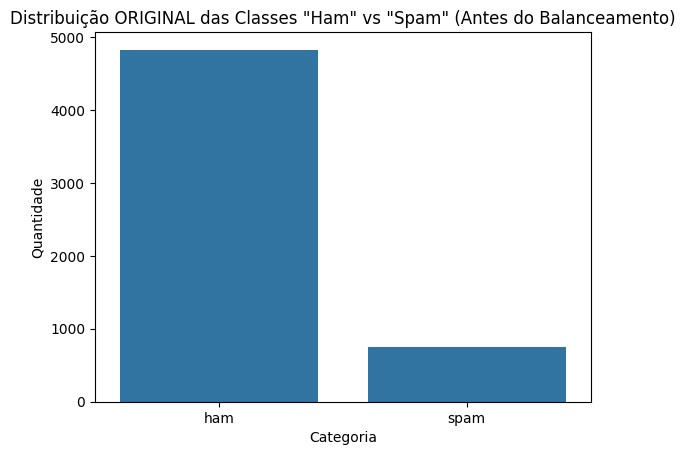

In [23]:

spam_original = pd.read_csv('/content/spam.csv')

sns.countplot(x='Category', data=spam_original)
plt.title('Distribuição ORIGINAL das Classes "Ham" vs "Spam" (Antes do Balanceamento)')
plt.xlabel('Categoria')
plt.ylabel('Quantidade')
plt.show()


Após aplicar um balanceamento, igualando a quantidade de exemplos das classes ham e spam, o modelo passou a ter condições mais justas de aprender as duas categorias. Isso ajuda a reduzir o viés na classificação e melhora a generalização do modelo.


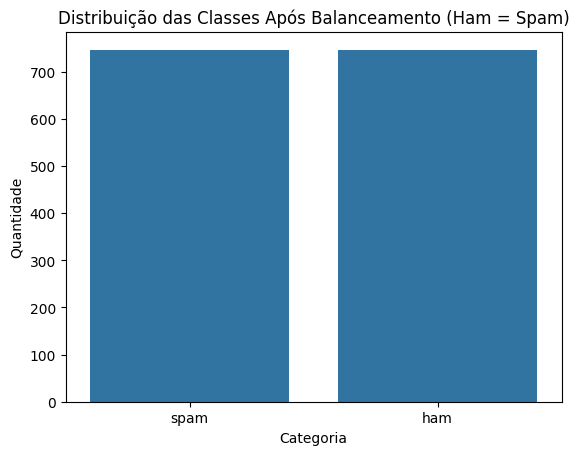

In [24]:
sns.countplot(x='Category', data=spam)
plt.title('Distribuição das Classes Após Balanceamento (Ham = Spam)')
plt.xlabel('Categoria')
plt.ylabel('Quantidade')
plt.show()

Este gráfico mostra a distribuição do número de palavras por e-mail. Podemos observar se os spams tendem a ser mais curtos ou longos que os e-mails legítimos, o que pode ser um indício útil para a classificação.


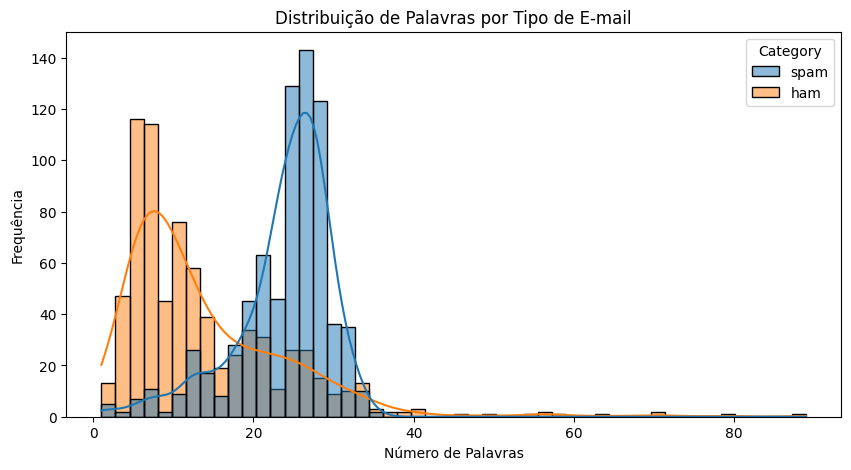

In [25]:
spam['Qtd_palavras'] = spam['Message'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 5))
sns.histplot(data=spam, x='Qtd_palavras', hue='Category', bins=50, kde=True)
plt.title('Distribuição de Palavras por Tipo de E-mail')
plt.xlabel('Número de Palavras')
plt.ylabel('Frequência')
plt.show()
